In [61]:
!pip install pandas numpy matplotlib seaborn

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = {
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Product': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'Sales': np.random.randint(50, 200, 100).astype(float), 
    'Price': np.random.uniform(10, 50, 100).round(2),
    'Rating': np.random.randint(1, 6, 100),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 100)
}

data['Sales'][5] = np.nan
data['Price'][10] = 1000
data['Rating'][15] = 10

df = pd.DataFrame(data)

df.to_csv('sales_data.csv', index=False)

df = pd.read_csv('sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Product,Sales,Price,Rating,Region
0,2023-01-01,B,91.0,43.66,1,South
1,2023-01-02,D,87.0,13.62,1,East
2,2023-01-03,A,89.0,49.08,3,North
3,2023-01-04,D,61.0,23.77,4,South
4,2023-01-05,B,71.0,43.23,3,West


缺失值统计:
Date       0
Product    0
Sales      1
Price      0
Rating     0
Region     0
dtype: int64


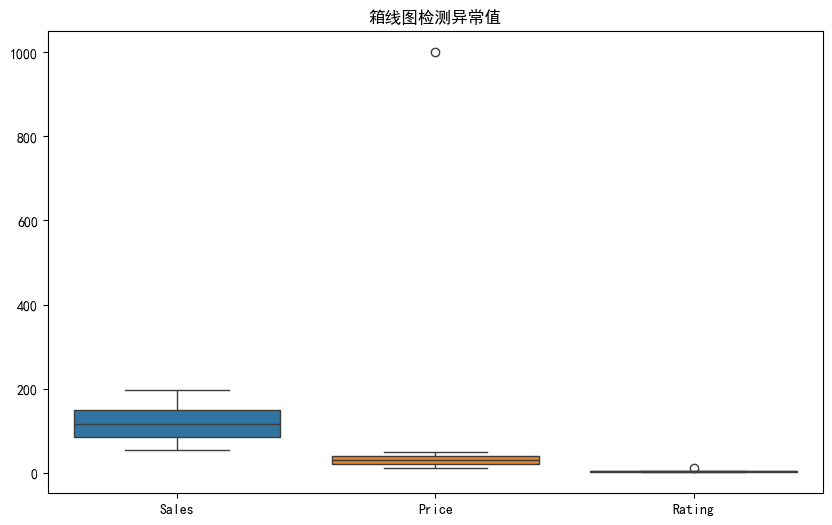

原始数据行数: 100
清洗后数据行数: 97


In [63]:
# 检查缺失值
print("缺失值统计:")
print(df.isnull().sum())

# 删除缺失值
df_cleaned = df.dropna()

# 检查异常值 - 使用箱线图识别
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['Sales', 'Price', 'Rating']])
plt.title('箱线图检测异常值')
plt.show()

# 定义函数处理异常值
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 处理Price和Rating的异常值
df_cleaned = remove_outliers(df_cleaned, 'Price')
df_cleaned = remove_outliers(df_cleaned, 'Rating')

print(f"原始数据行数: {len(df)}")
print(f"清洗后数据行数: {len(df_cleaned)}")

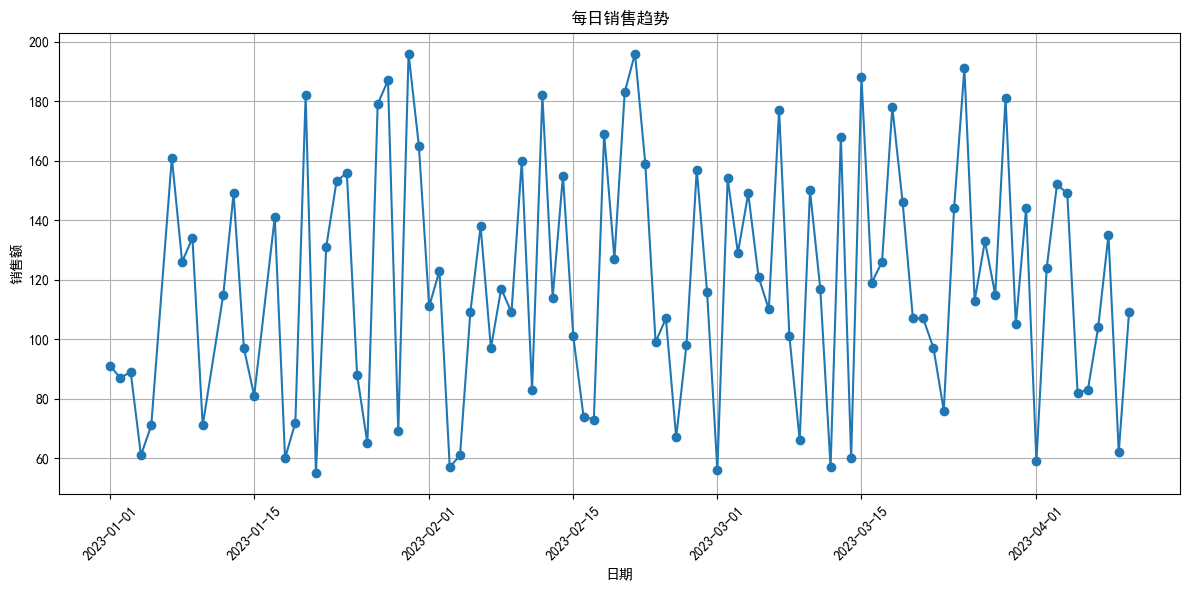

In [64]:
# 按日期分组计算总销售额
daily_sales = df_cleaned.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'], marker='o')
plt.title('每日销售趋势')
plt.xlabel('日期')
plt.ylabel('销售额')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

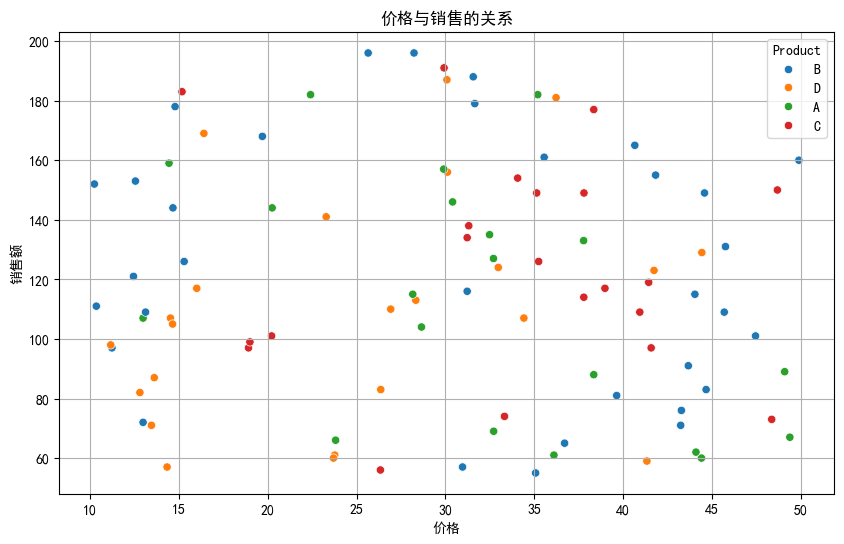

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Price', y='Sales', hue='Product')
plt.title('价格与销售的关系')
plt.xlabel('价格')
plt.ylabel('销售额')
plt.grid(True)
plt.show()

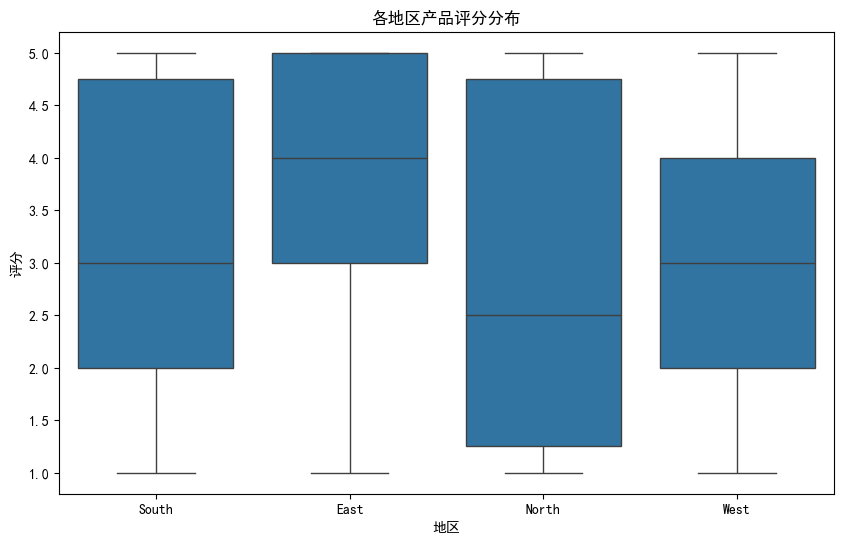

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Region', y='Rating')
plt.title('各地区产品评分分布')
plt.xlabel('地区')
plt.ylabel('评分')
plt.show()